In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
df = pd.read_csv("advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import statsmodels.api as sm

In [8]:
X = df[["TV", "Radio", "Newspaper"]]

In [9]:
y = df["Sales"]

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
X_sm = sm.add_constant(X)

In [12]:
X_sm.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [14]:
lr = sm.OLS(y, X_sm).fit() #fit 학습

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           8.13e-99
Time:                        03:18:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [17]:
y_pred = lr.predict(X_sm)

In [18]:
y_pred

0      21.220972
1      11.268248
2      10.496209
3      17.312447
4      15.644137
         ...    
195     7.105490
196    10.280941
197    15.259287
198    24.582220
199    18.185120
Length: 200, dtype: float64

In [19]:
residual = y - y_pred

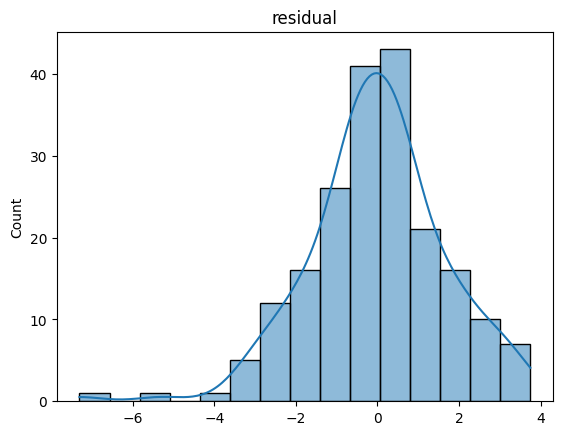

In [20]:
sns.histplot(residual, bins = 15, kde = True)
plt.title("residual") #normal distribution임
plt.show()

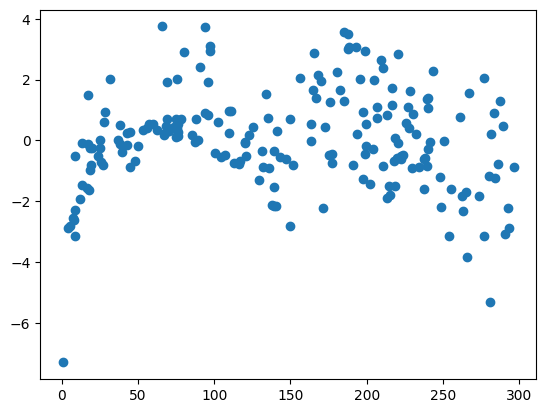

In [21]:
plt.scatter(df["TV"], residual)
plt.show() #0주위에 흩어져있는 것을 알 수 있다. ~N

#T-test (t-검정) 단일 표본 검정 (one sample t-test)

- 단일 모집 안에서 연속형 변수의 평균값을 특정 기준값과 비교하고자 할 때

  - 단일 표본 $t$ 검정은 하나로 구성된 모집단의 평균($mu$)값을 기준 값과 비교하고자 할 때 사용되는 분석법


### 기본 가정
1. 정규성

 - 독립변수에 따른 종속변수는 정규분포를 만족해야 함
 - 정규성 검정이 선행되어야 함

 **정규성을 확인하는 방법**
 1. QQ plot
 2. Shapiro-test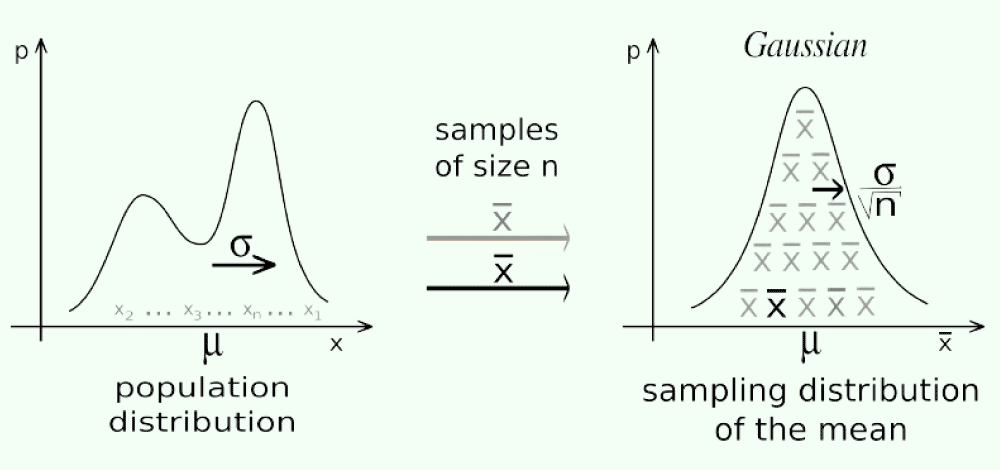

In [22]:
from scipy.stats import stats

In [23]:
import scipy as sp

In [26]:
norm_sample = np.random.normal(0, 10, 1000)

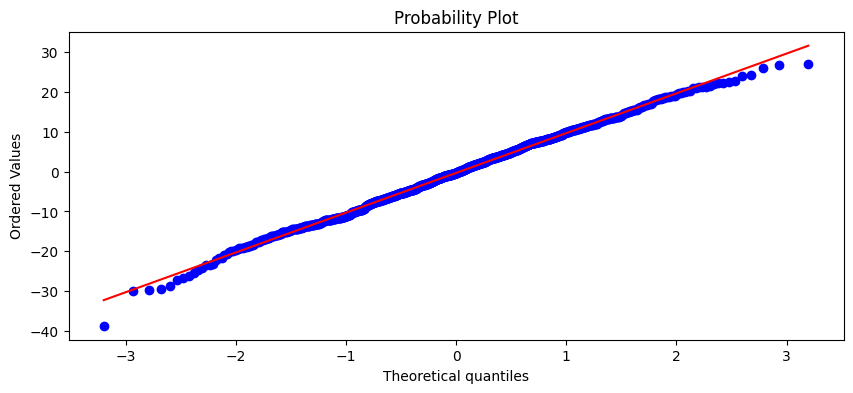

In [29]:
fig, ax = plt.subplots(figsize = (10, 4))
sp.stats.probplot(norm_sample, plot = ax)
plt.show()

In [30]:
norm_sample

array([ 1.61869020e+00, -1.22538598e+00, -3.35375098e+00,  3.56207864e+00,
        3.59085025e+00, -6.87952471e+00,  6.39636800e+00,  5.25495717e+00,
       -4.68442938e+00, -9.15962459e+00,  1.82591618e-01, -2.86626239e+00,
        3.96531209e+00, -5.23976295e+00,  3.42439363e+00,  1.34286470e+01,
       -3.15689927e+00, -7.50561697e+00,  8.19835526e+00, -2.84346656e+00,
       -3.83216560e-02,  8.61615072e+00, -1.84258651e+00,  4.73672119e+00,
       -4.82436000e+00, -7.55770047e-01,  4.21250987e-01, -1.39497458e+01,
       -2.91291685e+00,  1.59967166e+01, -7.87260260e+00, -1.62602710e+01,
       -1.13024345e+01,  1.70459450e+01, -3.43845558e+00,  9.26532529e+00,
       -6.80243616e+00,  8.97935799e+00,  2.16256795e+01,  1.31020221e+01,
       -9.36210837e-01, -1.12828749e+01,  1.14597889e+01,  1.81383059e+01,
        8.67406253e+00, -1.35862800e+01,  8.63754342e+00,  1.38395460e+01,
       -1.26441879e+01,  1.39283352e+00, -8.03827061e-01, -4.95253437e+00,
       -4.97962095e+00, -

- Shapiro Test
  - 귀무가설 : 해당 데이터가 정규성을 충족한다
    - 귀무가설을 accept하기 위해서(정규성을 만족하기 위해서) p-value > 0.05

    cf) TV의 영향력은 없다 라고 귀무가설
    p-value > 0.05이면 귀무가설을 accept => 영향력이 없다.

    reject하려면 p-value가 매우 작아야 함(영향력이 없다)

    null hypothesis = 영향력이 없다.

    - scipy.stats 모듈을 사용


In [33]:
from scipy.stats import shapiro

In [34]:
np.random.seed(0)
n = 1000
x1 = np.random.normal(0, 10, n)
shapiro_test = shapiro(x1)

In [35]:
shapiro_test #p-value가 큼 -> 귀무가설이 정규성을 만족한다. 중요

ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)

- p-value 값이 0.05보다 크기 때문에, 해당 데이터는 정규성을 충족한다.

##3 example

- 과수원에서 배를 생산함
- 일반적으로 과수원에서 생산한 배의 무게는 200g
- 실제로 과수원에서 생산한 배의 무게도 200g인지를 확인하기 위해 생산된 배 15개를 임의로 뽑아서 무게를 측정하고자 함

- 귀무가설 $H_0$ : $\mu = 200$
- 대립가설 $H_A$ : $\mu\neq 200$


In [36]:
mu = 200
pear = [200, 210, 180, 190, 185, 170, 180, 180, 210, 180, 183, 191, 204, 201, 187]

In [37]:
shapiro(pear)

ShapiroResult(statistic=0.9248351454734802, pvalue=0.2281571328639984)

In [38]:
from scipy import stats

In [39]:
pear_ttest = stats.ttest_1samp(pear, 200)

In [40]:
pear_ttest #null-hypothesis reject(if samples are the same value as 200g)

TtestResult(statistic=-3.1404979981824845, pvalue=0.00722684576077687, df=14)

- p-value : 0.0070
- 귀무가설을 reject(기각)
- 결과 : 배의 평균 무게는 200g이라고 할 수 없음

#예제 2

- 개의 체온이 24.3${^\circ}$C라고 할 수 있는지를 검정하기

In [41]:
uploaded = files.upload()

Saving crab.csv to crab.csv


- 귀무가설 $H_0 : \mu = 24.3$

In [49]:
crab = pd.read_csv("crab.csv")
crab.head()

,crab
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


In [50]:
crab_ttest = stats.ttest_1samp(crab, 24.3)
crab_ttest

TtestResult(statistic=array([2.7127693]), pvalue=array([0.01214554]), df=array([24]))

In [44]:
shapiro(df)

ShapiroResult(statistic=0.9761896729469299, pvalue=0.8007838726043701)

In [51]:
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals.csv


In [53]:
netflix = pd.read_csv("NetflixOriginals.csv", encoding_errors = "ignore")

In [55]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


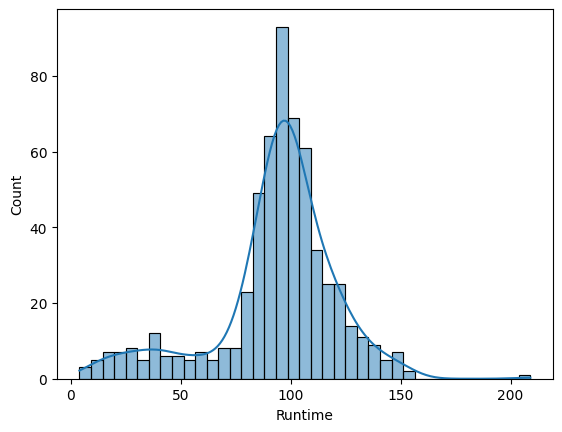

In [57]:
sns.histplot(netflix["Runtime"], kde = True)
plt.show()

In [58]:
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [59]:
np.mean(netflix["Runtime"])

93.57705479452055

- one smaple t-test
- $H_0$ : $\mu = 91.3$

In [66]:
netflix_ttest_1 = stats.ttest_1samp(netflix["Runtime"], 91.3)
netflix_ttest_1

TtestResult(statistic=1.9821390465346165, pvalue=0.04793278487063802, df=583)

- $H_0$ : $\mu = 93.0$

In [68]:
netflix_ttest_2 = stats.ttest_1samp(netflix["Runtime"], 93.0)
netflix_ttest_2

TtestResult(statistic=0.5023167834878675, pvalue=0.6156343750882074, df=583)

# CLT

- 모집단이 **평균이 $\mu$이고 표준편차가 $\sigma$인 임의의 분포** 를 이룬다고 할 떼, 이 모집단으로부터 추출된 표본이 충분히 크다면(표본의 크기 $n$이 충분히 크다)면 표본 평균들이 이루는 분포는 평균이 $\mu$이고 표준편차가 $\frac{\sigma}{\sqrt{n}}$


AttributeError: ignored

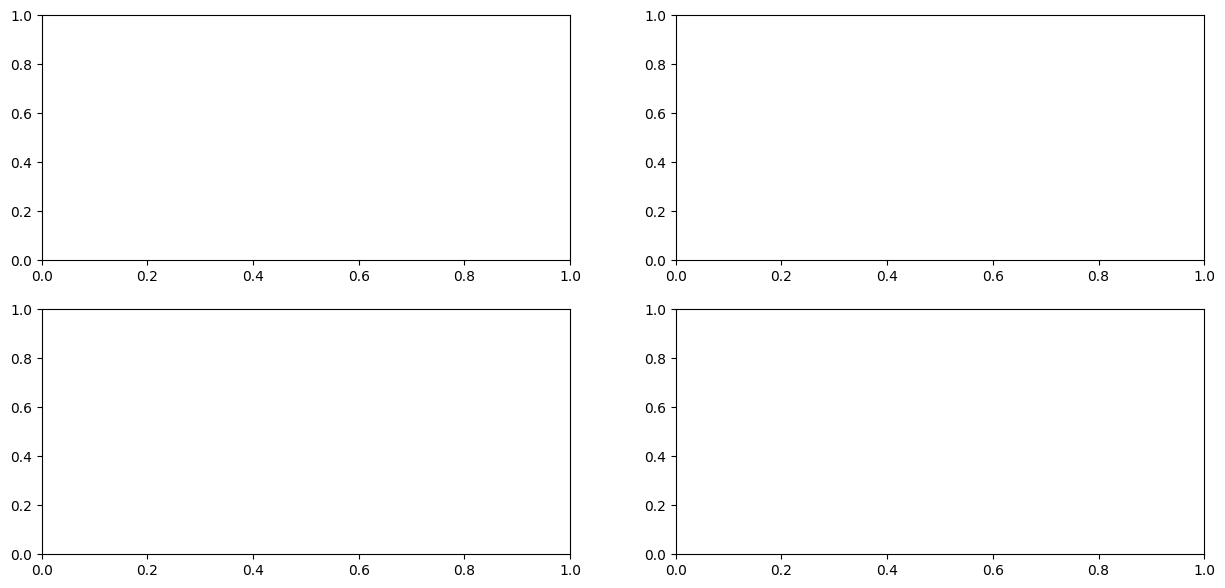

In [85]:
num = [1, 10, 50, 100]
means = []
for j in num:
  np.random.seed(0)
  x = [np.mean(np.random.randint(-50, 50, j)) for _i in range(10000)]

  means.append(x)

  k = 0
  fig, ax = plt.subplots(2, 2, figsize = (15, 7))

  for i in range(0, 2):
    for j in range(0, 2):
      ax[i, j].histplot(means[k], 10, density = True)
      ax[i, j].set_title(label = num[k])
      k += 1
  plt.show()

- 상단의 그래프를 통해서 샘플 사이즈가 1부터 100까지 증가할 수록 히스토그램이 정규분포를 따르고 있음을 확인할 수 있다.